# DATASETS and DATALOADERS
読みやすさとモジュール化のために、データセットのコードはモデル学習コードから切り離すことが理想的である  
Pytorchには`torch.utils.data.Dataset`,`torch.utils.data.DataLoader`という２つのデータセットを扱う基本要素がある  
これらを活用することであらかじめ用意されたデータセットや自分で作成したデータを使用することができる

`torch.utils.data.Dataset`にはサンプルとそれに対応するラベルが格納され、`torch.utils.data.DataLoader`にはイテレート処理が可能なデータが格納される

なお、PyTorch domain librariesにはFashionMNISTなどの多くのデータセットを提供している

## Loading a Dataset
ここではTorchVisionからFashion-MNISTをロードする例とする  
Fashion-MNISTは、60,000個の訓練データと10,000個のテストデータから構成された、Zalandoの記事画像のデータセットであり、各サンプルは、28×28のグレースケール画像と、10クラスのうちの1つのラベルから構成されている

FashionMNIST Datasetを読み込む際には、以下のパラメータを使用する
- root ：訓練/テストデータが格納されているパスを指定
- train ：訓練データまたはテストデータセットを指定
- download=True：root にデータが存在しない場合は、インターネットからデータをダウンロードを指定
- transform と target_transform：特徴量とラベルの変換を指定

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



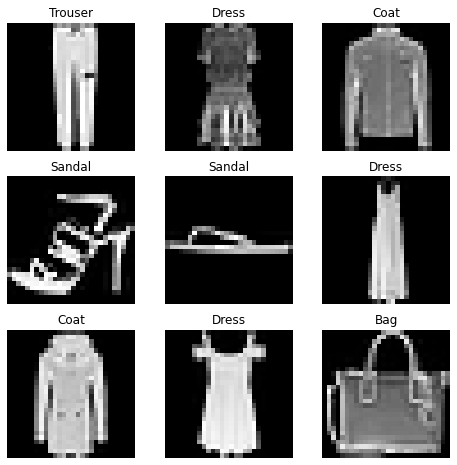

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files
自己学習用のデータセットの作り方  
下記3つのメソッドを持つクラスを定義する

- `__init__`
- `__len__`
- `__getitem__`

### `__init__`
画像、アノテーションデータなどを変換して初期化する

### `__len__`
学習用データのサンプル数を返却する

### `__getitem__`
引数idxを基にサンプルを返却する

In [26]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders
Datasetを使用することで1つのサンプルの、データとラベルを取り出せるが、モデルの学習時にはminibatches単位でデータを扱い、過学習を防ぐために各epochでデータはシャッフルされるべきである  
さらに、Pythonの multiprocessingを使用し、複数データの取り出しを高速化したい

DataLoaderは上記に示した複雑な処理を簡単に実行できるようにしてくれるAPIである

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [29]:
train_features, train_labels = next(iter(train_dataloader))

`batch_size`を64で指定しているので、1回のイテレーションで64個ずつのデータが取得できる

In [30]:
len(train_features)

64

In [31]:
len(train_labels)

64

In [36]:
train_feature = train_features[0]
train_label = train_labels[0]

In [59]:
train_feature

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [58]:
train_label

tensor(7)